In [127]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

from experiment import Experiment, decimal_range_hundreds


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [126]:
df_al_10 = pd.DataFrame()

for beta in [0.5, 0.8, 0.9, 1.0]:
    data = json.loads(open(f"./data/al_1.0_bet_{beta}.json").read())
    for q in data:
        df_al_10[f'beta_{beta}_{q}'] = data[q]

df_al_10.head()

,beta_0.5_junior,beta_0.5_middle,beta_0.5_senior,beta_0.8_junior,beta_0.8_middle,beta_0.8_senior,beta_0.9_junior,beta_0.9_middle,beta_0.9_senior,beta_1.0_junior,beta_1.0_middle,beta_1.0_senior
0,99.179783,162.246500,233.438280,113.097669,181.934893,277.934070,121.137693,191.779090,267.896815,121.121103,211.650512,287.558966
1,103.696872,148.492108,209.428717,119.294778,180.086784,259.751839,121.458733,190.110639,271.686325,137.324607,224.698699,289.930017
2,88.018922,127.881900,208.213940,111.727761,172.482828,258.131044,113.193691,192.702921,263.803696,141.926418,229.745464,297.418631
3,80.596320,119.601583,204.042751,116.954723,162.090413,237.312203,125.385134,181.384596,263.803066,142.123160,235.802695,285.183966
4,73.345707,113.189843,192.362893,107.851338,146.254772,232.935054,128.717856,188.223769,256.188553,145.084446,220.026278,290.552121


No handles with labels found to put in legend.
No handles with labels found to put in legend.
(3,)


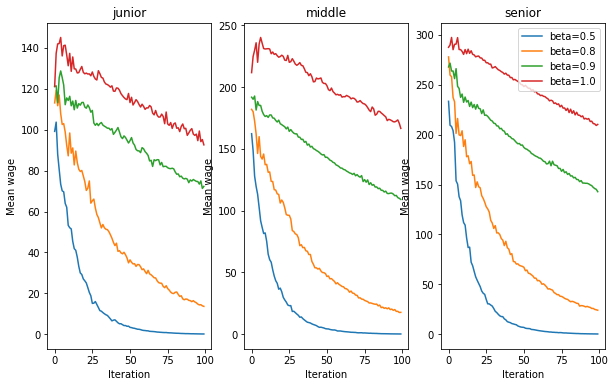

In [132]:
fig1, axs = plt.subplots(1, 3, figsize=(10,6))

print(axs.shape)
for ax, qual in zip(axs, ['junior', 'middle', 'senior']):    

    ax.set_title(f'{qual}')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Mean wage')
    for alpha, beta in zip([1.0, 1.0, 1.0, 1.0], [0.5, 0.8, 0.9, 1.0]):
        y = df_al_10['beta_' + str(beta)+ '_' + qual]
        x = np.arange(0, len(y))
        ax.plot(x, y, label=f'beta={beta}')
    plt.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
(3,)


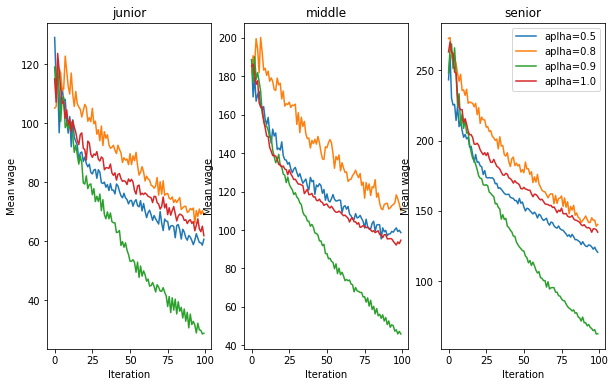

In [136]:
df_bet_084 = pd.DataFrame()

for alpha in [0.5, 0.8, 0.9, 1.0]:
    data = json.loads(open(f"./data_first_variation/al_{alpha}_bet_0.84.json").read())
    for q in data:
        df_bet_084[f'alpha_{alpha}_{q}'] = data[q]

fig1, axs = plt.subplots(1, 3, figsize=(10,6))

print(axs.shape)
for ax, qual in zip(axs, ['junior', 'middle', 'senior']):    

    ax.set_title(f'{qual}')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Mean wage')
    for alpha, beta in zip([0.5, 0.8, 0.9, 1.0], [0.84, 0.84, 0.84, 0.84]):
        y = df_bet_084['alpha_' + str(alpha)+ '_' + qual]
        x = np.arange(0, len(y))
        ax.plot(x, y, label=f'aplha={alpha}')
    plt.legend()


No handles with labels found to put in legend.
No handles with labels found to put in legend.
(3,)


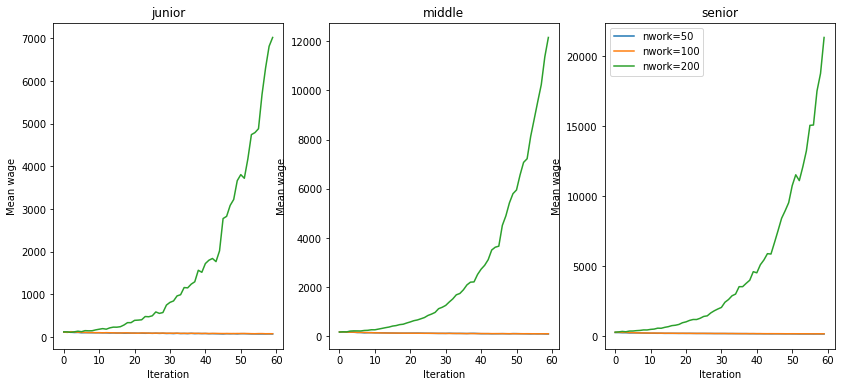

In [176]:
df_n_work = pd.DataFrame()

for exp, nwork in zip([5,  8], [50, 200]):
    data = json.loads(open(f"./data_sec_variations/al_1.0_bet_0.84_exp_{exp}.json").read())
    for q in data:
        df_n_work[f'nwork_{nwork}_{q}'] = data[q]

data = json.loads(open(f"./data_first_variation/al_1.0_bet_0.84.json").read())
for q in data:
    df_n_work[f'nwork_100_{q}'] = data[q]


fig1, axs = plt.subplots(1, 3, figsize=(14,6))

print(axs.shape)
for ax, qual in zip(axs, ['junior', 'middle', 'senior']):    

    ax.set_title(f'{qual}')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Mean wage')
    for alpha, beta, nwork in zip([1.0, 1.0, 1.0], [0.84, 0.84, 0.84], [50, 100, 200]):
        y = df_n_work['nwork_' + str(nwork)+ '_' + qual][:60]
        x = np.arange(0, len(y))[:60]
        ax.plot(x, y, label=f'nwork={nwork}')
    plt.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
(3,)


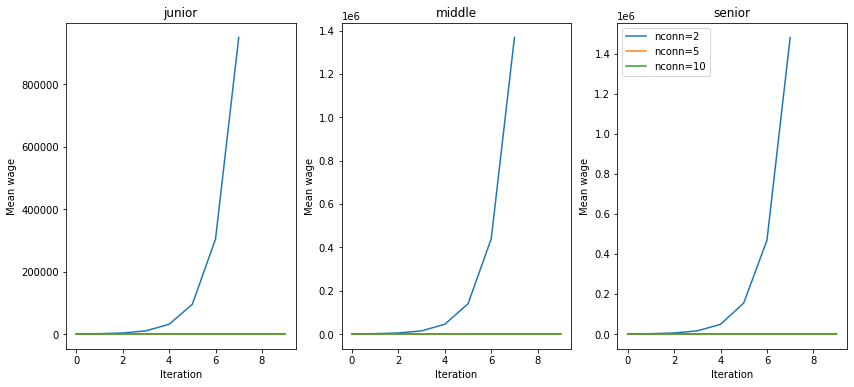

In [178]:
df_n_conn = pd.DataFrame()

for exp, nconn in zip([6,  7], [10, 2]):
    data = json.loads(open(f"./data_sec_variations/al_1.0_bet_0.84_exp_{exp}.json").read())
    for q in data:
        df_n_conn[f'nconn_{nconn}_{q}'] = pd.Series([0]*len(data[q])).add(data[q],fill_value=0)

data = json.loads(open(f"./data_first_variation/al_1.0_bet_0.84.json").read())
for q in data:
    df_n_conn[f'nconn_5_{q}'] = data[q]


fig1, axs = plt.subplots(1, 3, figsize=(14,6))

print(axs.shape)
for ax, qual in zip(axs, ['junior', 'middle', 'senior']):    

    ax.set_title(f'{qual}')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Mean wage')
    for alpha, beta, nconn in zip([1.0, 1.0, 1.0], [0.84, 0.84, 0.84], [2, 5, 10]):
        y = df_n_conn['nconn_' + str(nconn)+ '_' + qual][:10]
        x = np.arange(0, len(y))[:10]
        ax.plot(x, y, label=f'nconn={nconn}')
    plt.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
(3,)


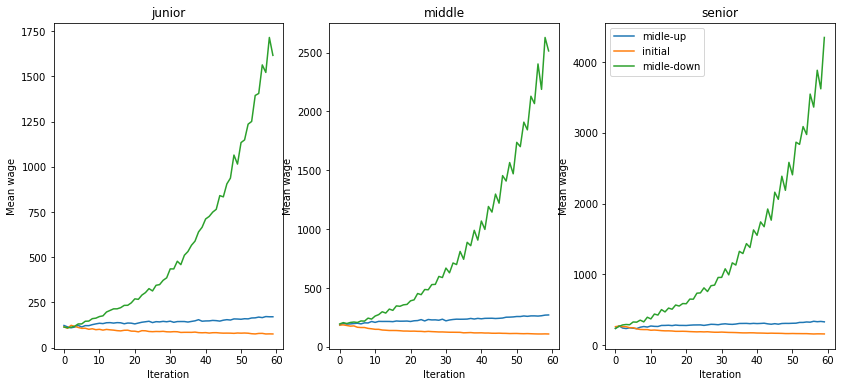

In [175]:
df_q_ratio = pd.DataFrame()

for exp, change in zip([3,  4], ['midle-up', 'midle-down']):
    data = json.loads(open(f"./data_sec_variations/al_1.0_bet_0.84_exp_{exp}.json").read())
    for q in data:
        df_q_ratio[f'{change}_{q}'] = pd.Series([0]*len(data[q])).add(data[q],fill_value=0)

data = json.loads(open(f"./data_first_variation/al_1.0_bet_0.84.json").read())
for q in data:
    df_q_ratio[f'initial_{q}'] = data[q]


fig1, axs = plt.subplots(1, 3, figsize=(14,6))

print(axs.shape)
for ax, qual in zip(axs, ['junior', 'middle', 'senior']):    

    ax.set_title(f'{qual}')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Mean wage')
    for alpha, beta, change in zip([1.0, 1.0, 1.0], [0.84, 0.84, 0.84], ['midle-up', 'initial','midle-down']):
        y = df_q_ratio[ change + '_' + qual][:60]
        x = np.arange(0, len(y))[:60]
        ax.plot(x, y, label=f'{change}')
    plt.legend()